   ***Partie I  
Test de Neyman-Pearson : cas d'un adversaire passif***

**1.1. Deux hypothèses simples**

* 1.1.1.

1) a) Comme vu en cours on obtient :

$
   \sum_{k=0}^{255} P_{y_{Blanc}}^n (k) * log(\frac{Q_{Blanc}(k)}{P_{Blanc}(k)})+ \sum_{k=0}^{255}  P_{y_{Noir}}^n(k) * log(\frac{Q_{Noir}(k)}{P_{Noir}(k)})
$

que l'on implémentera par la suite

1) b)Le critère de Neyman Pearson consiste à optimiser la probabilité de détection en maintenant une probabilité de première espèce inférieure au seuil donné.

2) a)
$\alpha$ est la probabilité de première espèce : refuser $H_0$ alors qu'elle est vraie.
$\alpha = P(H_1 | H_0)$

$\beta$ est la probabilité de seconde espèce : accepter $H_1$ alors qu'elle est fausse.
$\beta = P(H_0 | H_1)$

In [177]:
import os
import matplotlib.pyplot as plt
import skimage.io as io
import numpy as np
import glob
import pathlib
from pathlib import Path
import math

Nombre de pixels noirs :  392
Nombre de pixels blancs :  392


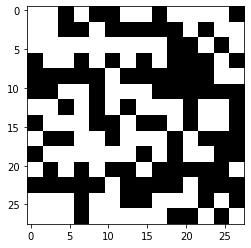

In [178]:
# On importe l'image originale ou code original

original=io.imread(r'C:\Users\boite\OneDrive\Bureau\Germain\IMT_lille_douai\cybersecurite\SAFE\TP_Sawayah\BarcodesA\BarcodesA\OriginalCode.pgm')
plt.imshow(original,cmap='gray')
dimCode = ((len(original)**2)/2)


#Création des deux sous suites yblanc et ynoir qui receuillent les indices (ce qui n'est pas le cas dans l'énoncé)
y_noirs=np.array([[i,j]for i in range(len(original)) for j in range(len(original[0])) if original[i][j]==0])
y_blancs=np.array([[i,j]for i in range(len(original)) for j in range(len(original[0])) if original[i][j]==255])

print('Nombre de pixels noirs : ',len(y_noirs))
print('Nombre de pixels blancs : ',len(y_blancs))


#Il y a autant de pixels Blancs que Noirs


In [179]:
# On nomme les répertoires associés à la première partie
BarcodesA=r'C:\Users\boite\OneDrive\Bureau\Germain\IMT_lille_douai\cybersecurite\SAFE\TP_Sawayah\BarcodesA\BarcodesA'
BarcodesF=r'C:\Users\boite\OneDrive\Bureau\Germain\IMT_lille_douai\cybersecurite\SAFE\TP_Sawayah\BarcodesF\BarcodesF'


In [180]:


#constantes pour hypothèse 0
u00=50
u0255=230
sigma2=120


#constantes pour hypothèse 1
u10=48
u1255=228
sigma2=120

In [181]:
def f(xi,const):
    return (1/(2*np.pi*sigma2**(1/2)))*math.exp((-1/(2*sigma2))*(xi-const)**2)

def Z(const):
    somme=0
    for i in range(255):
        somme+=f(i,const)
    return somme**(1/2)

Z_noir=Z(u00)
Z_blanc=Z(u0255)

Z_noir_prime=Z(u10)
Z_blanc_prime=Z(u1255)

def P_noir(k):
    return (1/Z_noir)*f(k,u00)

def P_blanc(k):
    return (1/Z_blanc)*f(k,u0255)

def Q_noir(k):
    return (1/Z_noir_prime)*f(k,u10)

def Q_blanc(k):
    return (1/Z_blanc_prime)*f(k,u1255)


In [182]:
def Pn(ycolor,dir_name):
    p = Path(dir_name)
    stat = []
    c = 0
    for fname in p.glob("*.*"):
        stat.append([0]*256) #pour chaque image on créer une liste de taille 256 (toutes les valeurs de gris possibles)
        I = io.imread(fname)
        for z in ycolor:
            stat[c][I[z[0]][z[1]]]+=1  #ajoute le nb de pixel ayant 
        c+=1 #on passe à l'image suivante
    return stat

PnyBlancsA = Pn(y_blancs,BarcodesA)
PnyNoirsA = Pn(y_noirs,BarcodesA)
PnyBlancsF = Pn(y_blancs,BarcodesF)
PnyNoirsF = Pn(y_noirs,BarcodesF)


In [195]:
def statistiques(dir_name,PnyNoirs,PnyBlancs,dimCode):
    T = []
    p = Path(dir_name)

    c=0
    for fname in p.glob("*.*"):
        valN = 0
        valB = 0
        for k in range(256):
            valN+= math.log(Q_noir(k)/P_noir(k))*(PnyNoirs[c][k]/dimCode)
            valB+= math.log(Q_blanc(k)/P_blanc(k))*(PnyBlancs[c][k]/dimCode)
        T.append(valN+valB)
        c+=1

    return T

TA = statistiques(BarcodesA,PnyNoirsA,PnyBlancsA,dimCode)[:-1]
TF = statistiques(BarcodesF,PnyNoirsF,PnyBlancsF,dimCode)[:-1]

print(TA)



[-0.019266285373303705, -0.048828110103195654, -0.03612302807038255, -0.02831990682188311, -0.014064204540970758, -0.03427228777426411, -0.03532270794233128, -0.029670447037969543, -0.028119826789870316, -0.046427149719042014, -0.04072486880667702, -0.03952438861460021, -0.03952438861460021, -0.02801978677386395, -0.04622706968702918, -0.017265485053175676, -0.03567284799835371, -0.05658121134369182, -0.060832912023963945, -0.033672047678225625, -0.06243355228006642, -0.051129030471342915, -0.02131710570143497, -0.058682051679826305, -0.05488053107158297, -0.041024988854696305, -0.021417145717441292, -0.05282971074345175, -0.04227548905477629, -0.041575208942731444, -0.06488453267222329, -0.07618905448094673, -0.025918946437729455, -0.03302178757418405, -0.06853599325645696, -0.060632831991951144, 0.011596059564671506, -0.020166645517361338, -0.047077409823083644, -0.032021387414120035, -0.045026589494952377, -0.033121827590190396, -0.04357600926285954, -0.03837392843052659, -0.0203167

2)c) Pour compter les fausses alarmes, il faut vérifier $T_A$ > seuil.

2)d) Pour compter la non détection, il faut vérifier $T_F$ < seuil.

(array([  11.,  103.,  631., 1723., 2904., 2714., 1412.,  419.,   73.,
          10.]),
 array([-0.08375208, -0.07374783, -0.06374358, -0.05373932, -0.04373507,
        -0.03373082, -0.02372657, -0.01372232, -0.00371807,  0.00628619,
         0.01629044]),
 <BarContainer object of 10 artists>)

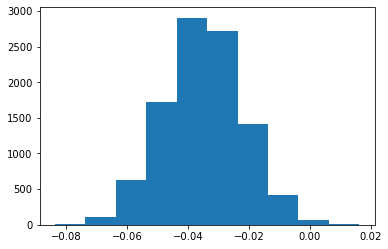

In [95]:
# On visualise la répartition des Authentiques vis à vis de leur statistiques
plt.hist(TA)

(array([  37.,  250.,  898., 2042., 2917., 2327., 1159.,  309.,   57.,
           4.]),
 array([-0.01338643, -0.00369256,  0.00600132,  0.0156952 ,  0.02538908,
         0.03508295,  0.04477683,  0.05447071,  0.06416459,  0.07385846,
         0.08355234]),
 <BarContainer object of 10 artists>)

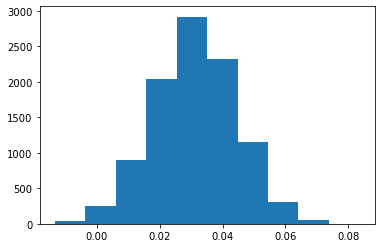

In [96]:
# On visualise la répartition des Falsifiés vis à vis de leur statistiques
plt.hist(TF)

['alpha =    0.0275', 'beta =     0.0003', 'seuil = -0.01']
['alpha =    0.0237', 'beta =     0.0008', 'seuil = -0.009']
['alpha =    0.0197', 'beta =     0.0012', 'seuil = -0.008']
['alpha =    0.0156', 'beta =     0.0015', 'seuil = -0.007']
['alpha =    0.0129', 'beta =     0.0018', 'seuil = -0.006']
['alpha =    0.0102', 'beta =     0.0023', 'seuil = -0.005']
['alpha =    0.0085', 'beta =     0.0034', 'seuil = -0.004']
['alpha =    0.0075', 'beta =     0.0050', 'seuil = -0.003']
['alpha =    0.0061', 'beta =     0.0065', 'seuil = -0.002']
['alpha =    0.0050', 'beta =     0.0075', 'seuil = -0.001']
['alpha =    0.0037', 'beta =     0.0091', 'seuil = 0.0']
['alpha =    0.0034', 'beta =     0.0116', 'seuil = 0.001']
['alpha =    0.0031', 'beta =     0.0142', 'seuil = 0.002']
['alpha =    0.0026', 'beta =     0.0171', 'seuil = 0.003']
['alpha =    0.0018', 'beta =     0.0196', 'seuil = 0.004']
['alpha =    0.0016', 'beta =     0.0236', 'seuil = 0.005']
['alpha =    0.0013', 'beta =    

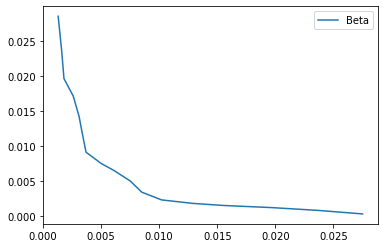

In [100]:
alphas =[]
betas= []
for i in range(-10,7):
    seuil = i/1000
    alpha = np.count_nonzero(np.array(TA)>seuil)/len(TA) #on compte le nombre d'Authentiques dont la stat est > seuil
    beta = np.count_nonzero(np.array(TF)<seuil)/len(TF) #on compte le nombre de Falsifiés dont la stat est < seuil
    print(['alpha ='+"{:10.4f}".format(alpha),'beta = '+"{:10.4f}".format(beta),'seuil = '+str(seuil)])
    alphas.append(alpha)
    betas.append(beta)

plt.plot(alphas, betas,label='Beta')
plt.legend()

**1.1.2 Test des codes**

In [57]:
BarcodesTpass = r'C:\Users\boite\OneDrive\Bureau\Germain\IMT_lille_douai\cybersecurite\SAFE\TP_Sawayah\Testcodes_pas'

On choisit un seuil de -0.004 pour obtenir $\alpha = 10^{-2}$.

In [54]:
originalT = io.imread(r'C:\Users\boite\OneDrive\Bureau\Germain\IMT_lille_douai\cybersecurite\SAFE\TP_Sawayah\Testcodes_pas\OriginalCode.pgm')

In [55]:
y_noirsT=np.array([[i,j]for i in range(len(originalT)) for j in range(len(originalT[0])) if originalT[i][j]==0])
y_blancsT=np.array([[i,j]for i in range(len(originalT)) for j in range(len(originalT[0])) if originalT[i][j]==255])

In [64]:
PnyBlancsTest = Pn(y_noirsT,BarcodesTpass)
PnyNoirsTest = Pn(y_blancsT,BarcodesTpass)
# print(PnyNoirsTest)

Progression : 0
Progression : 0


In [124]:
TTestP = statistiques(BarcodesTpass,PnyNoirsTest,PnyBlancsTest,900)[:-1]
print(TTestP)

start = r'C:\Users\boite\OneDrive\Bureau\Germain\IMT_lille_douai\cybersecurite\SAFE\TP_Sawayah\Testcodes_pas' 
#on retirera le début du nom de chaque fichier pour plus de lisibilité
path= Path(start)

seuil=-0.004
p=Path(BarcodesTpass)
i=0
for fname in p.glob("*2Dbarcode*.*"):
    if TTestP[i]<seuil:
        print(str(os.path.relpath(fname, path))+': est Authentique')
    else :
        print(str(os.path.relpath(fname, path))+': est Falsifié')
    i+=1

[-0.0072934984135750724, 0.011558353438277491, -0.019237942858020052, 0.007076871956795072, 0.01991020529012877, 0.010169464549387053, -0.0023305354506115705, -0.01868238730246441, -0.009478683598760584, 0.016576871956795358]
2Dbarcode1.pgm: est Authentique
2Dbarcode10.pgm: est Falsifié
2Dbarcode2.pgm: est Authentique
2Dbarcode3.pgm: est Falsifié
2Dbarcode4.pgm: est Falsifié
2Dbarcode5.pgm: est Falsifié
2Dbarcode6.pgm: est Falsifié
2Dbarcode7.pgm: est Authentique
2Dbarcode8.pgm: est Authentique
2Dbarcode9.pgm: est Falsifié


Avec la valeur de seuil égale à -0,004 on peut maintenant prédire l'état (Authentique ou non) d'un QRcode.

**1.2 Une hypothèse simple ($H_0$) et une hypothèse composée ($H_1$)**

3)On a toujours la statistique suivante :

$
   \sum_{k=0}^{255} P_{y_{Blanc}}^n (k) * log(\frac{Q_{Blanc}(k)}{P_{Blanc}(k)})+ \sum_{k=0}^{255}  P_{y_{Noir}}^n(k) * log(\frac{Q_{Noir}(k)}{P_{Noir}(k)})
$

In [138]:
# Nous sommes obligés de créer une nouvelle fonction comme les constantes û1 varient désormais avec l'image.
# et par conséquent modifier les anciennes

def P_noir_1_2(k,u):
    return (1/Z_noir)*f(k,u)

def P_blanc_1_2(k,u):
    return (1/Z_blanc)*f(k,u)

def Q_noir_1_2(k,u):
    return (1/Z_noir_prime)*f(k,u)

def Q_blanc_1_2(k,u):
    return (1/Z_blanc_prime)*f(k,u)


def statistiques2(dir_name,PnyNoirs,PnyBlancs,dimCode,yblancs,ynoirs):
    T = []
    p = Path(dir_name)

    c=0
    for fname in p.glob("*.*"):

        
        #Calcul de u10 et u1255
        
        I = io.imread(fname)
        u10 = 0
        u1255 = 0
        
        for z in yblancs:
                u1255+=I[z[0]][z[1]] #somme les valeur des pixel de l'image sélectionnée pour tous les pixels blancs
                
        for z in ynoirs:
                u10+=I[z[0]][z[1]] #somme les valeur des pixel de l'image sélectionnée pour tous les pixels noirss
                
        u10 = min(u10/len(ynoirs),u00-1)
        u1255 = min(u1255/len(yblancs),u0255-1) # on choisit le minimum comme ce qui a été défini dans l'énoncé
        
        #Calcul de la statistique
        valN = 0
        valB = 0
        for k in range(256):
            valN+= math.log(Q_noir_1_2(k,u10)/P_noir_1_2(k,u00))*(PnyNoirs[c][k])
            valB+= math.log(Q_blanc_1_2(k,u1255)/P_blanc_1_2(k,u0255))*(PnyBlancs[c][k])
        T.append(2*(valN+valB)/dimCode)
        c+=1

    return T

TA_1_2 = statistiques2(BarcodesA,PnyNoirsA,PnyBlancsA,dimCode,y_blancs,y_noirs)[:-1]
TF_1_2 = statistiques2(BarcodesF,PnyNoirsF,PnyBlancsF,dimCode,y_blancs,y_noirs)[:-1]

(array([  14.,  169.,  973., 2489., 3342., 2132.,  721.,  135.,   21.,
           4.]),
 array([-0.06954498, -0.05846199, -0.04737899, -0.036296  , -0.02521301,
        -0.01413002, -0.00304703,  0.00803596,  0.01911895,  0.03020194,
         0.04128493]),
 <BarContainer object of 10 artists>)

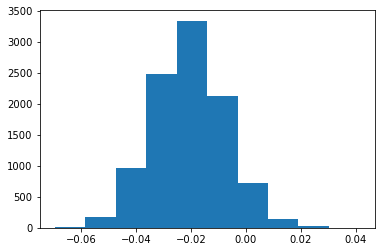

In [184]:
plt.hist(TA_1_2)

(array([2.600e+02, 1.665e+03, 3.090e+03, 2.733e+03, 1.477e+03, 5.880e+02,
        1.380e+02, 4.300e+01, 4.000e+00, 2.000e+00]),
 array([0.0008602 , 0.02235524, 0.04385028, 0.06534532, 0.08684035,
        0.10833539, 0.12983043, 0.15132546, 0.1728205 , 0.19431554,
        0.21581057]),
 <BarContainer object of 10 artists>)

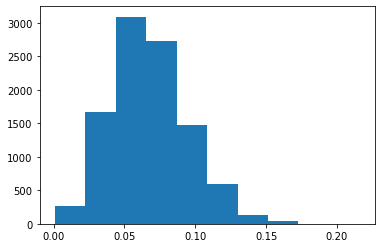

In [185]:
plt.hist(TF_1_2)

['alpha =     0.0566', 'beta =     0.0000', 'seuil = 0.0']
['alpha =     0.0497', 'beta =     0.0001', 'seuil = 0.001']
['alpha =     0.0421', 'beta =     0.0001', 'seuil = 0.002']
['alpha =     0.0352', 'beta =     0.0002', 'seuil = 0.003']
['alpha =     0.0303', 'beta =     0.0003', 'seuil = 0.004']
['alpha =     0.0265', 'beta =     0.0006', 'seuil = 0.005']
['alpha =     0.0223', 'beta =     0.0011', 'seuil = 0.006']
['alpha =     0.0184', 'beta =     0.0014', 'seuil = 0.007']
['alpha =     0.0160', 'beta =     0.0015', 'seuil = 0.008']
['alpha =     0.0144', 'beta =     0.0018', 'seuil = 0.009']
['alpha =     0.0116', 'beta =     0.0023', 'seuil = 0.01']
['alpha =     0.0098', 'beta =     0.0035', 'seuil = 0.011']
['alpha =     0.0085', 'beta =     0.0045', 'seuil = 0.012']
['alpha =     0.0070', 'beta =     0.0058', 'seuil = 0.013']
['alpha =     0.0054', 'beta =     0.0068', 'seuil = 0.014']


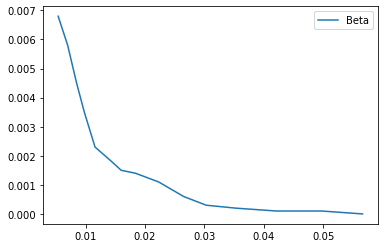

In [186]:
alphas1_2 =[]
betas1_2= []
for i in range(0,15):
    seuil = i/1000
    alpha = np.count_nonzero(np.array(TA_1_2)>seuil)/len(TA_1_2)
    beta = np.count_nonzero(np.array(TF_1_2)<seuil)/len(TF_1_2)
    print(['alpha = '+"{:10.4f}".format(alpha),'beta = '+"{:10.4f}".format(beta),'seuil = '+str(seuil)])
    alphas1_2.append(alpha)
    betas1_2.append(beta)

plt.plot(alphas1_2, betas1_2,label='Beta')
plt.legend()

*4) Test sur les codes d'essai*

avec seuil = 0.011 pour avoir  $\alpha = 10^{-2}$.

In [187]:
TTestP = statistiques(BarcodesTpass,PnyNoirsTest,PnyBlancsTest,900)[:-1]
print(TTestP)

start = r'C:\Users\boite\OneDrive\Bureau\Germain\IMT_lille_douai\cybersecurite\SAFE\TP_Sawayah\Testcodes_pas' 
#on retirera le début du nom de chaque fichier pour plus de lisibilité
path= Path(start)

seuil=0.011
p=Path(BarcodesTpass)
i=0
for fname in p.glob("*2Dbarcode*.*"):
    if TTestP[i]<seuil:
        print(str(os.path.relpath(fname, path))+': est Authentique')
    else :
        print(str(os.path.relpath(fname, path))+': est Falsifié')
    i+=1

[-0.0072934984135750724, 0.011558353438277491, -0.019237942858020052, 0.007076871956795072, 0.01991020529012877, 0.010169464549387053, -0.0023305354506115705, -0.01868238730246441, -0.009478683598760584, 0.016576871956795358]
2Dbarcode1.pgm: est Authentique
2Dbarcode10.pgm: est Falsifié
2Dbarcode2.pgm: est Authentique
2Dbarcode3.pgm: est Authentique
2Dbarcode4.pgm: est Falsifié
2Dbarcode5.pgm: est Authentique
2Dbarcode6.pgm: est Authentique
2Dbarcode7.pgm: est Authentique
2Dbarcode8.pgm: est Authentique
2Dbarcode9.pgm: est Falsifié


Cela diffère du résultat précédent comme 2Dbarcode3.pgm et 2Dbarcode6.pgm sont désormais reconnus comme authentiques.

**Partie II : Cas de l'adversaire actif**

**2.1 Deux hypothèses simples**

In [188]:
# Partie II (les noms de varibles diffèrent de la partie I grâce au suffixe "_part2")

#constantes de la partie II
u00_part2=54
u0255_part2=100
sigma2=102

kappa=int((u00_part2+u0255_part2)/2) #seuil de décision

dimCode_part2=900

def P_bw(const):
    somme=0
    for i in range(kappa,256):
        somme+=f(i,const)
    return somme**(1/2)

def P_wb(const):
    somme=0
    for i in range(0,kappa):
        somme+=f(i,const)
    return somme**(1/2)

P_bw_part2=P_bw(u00_part2)
P_wb_part2=P_wb(u0255_part2)

def P_noir_part2(k):
    return (1/Z_noir)*f(k,u00_part2)

def P_blanc_part2(k):
    return (1/Z_blanc)*f(k,u0255_part2)

def Q_noir_part2(k):
    return (1-P_bw_part2)*P_noir_part2(k) + P_bw_part2*P_blanc_part2(k)

def Q_blanc_part2(k):
    return (1-P_wb_part2)*P_blanc_part2(k) + P_wb_part2*P_noir_part2(k)


def statistiques_part2(dir_name,PnyNoirs,PnyBlancs,dimCode):
    T = []
    p = Path(dir_name)

    c=0
    for fname in p.glob("*.*"):
        valN = 0
        valB = 0
        for k in range(256):
            valN+= math.log(Q_noir_part2(k)/P_noir_part2(k))*(PnyNoirs[c][k]/dimCode_part2)
            valB+= math.log(Q_blanc_part2(k)/P_blanc_part2(k))*(PnyBlancs[c][k]/dimCode_part2)
        T.append(valN+valB)
        c+=1

    return T



(array([1297., 3146., 2680., 1563.,  781.,  335.,  129.,   47.,   16.,
           6.]),
 array([-0.06894716, -0.06666376, -0.06438036, -0.06209696, -0.05981356,
        -0.05753017, -0.05524677, -0.05296337, -0.05067997, -0.04839657,
        -0.04611317]),
 <BarContainer object of 10 artists>)

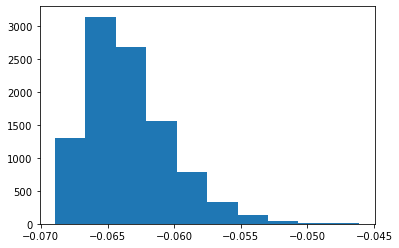

In [189]:
#2.1.2

originalMG=io.imread(r'C:\Users\boite\OneDrive\Bureau\Germain\IMT_lille_douai\cybersecurite\SAFE\TP_Sawayah\MGBarcodesA\OriginalCode.pgm')

MGBarcodesA=r'C:\Users\boite\OneDrive\Bureau\Germain\IMT_lille_douai\cybersecurite\SAFE\TP_Sawayah\MGBarcodesA'
MGBarcodesF=r'C:\Users\boite\OneDrive\Bureau\Germain\IMT_lille_douai\cybersecurite\SAFE\TP_Sawayah\MGBarcodesF'

#Création des deux sous suites yblanc et ynoir qui receuillent les indices (ce qui n'est pas le cas dans l'énoncé)
y_noirsMG=np.array([[i,j]for i in range(len(originalMG)) for j in range(len(originalMG[0])) if originalMG[i][j]==0])
y_blancsMG=np.array([[i,j]for i in range(len(originalMG)) for j in range(len(originalMG[0])) if originalMG[i][j]==255])



PnyBlancsA_part2 = Pn(y_blancsMG,MGBarcodesA)
PnyNoirsA_part2 = Pn(y_noirsMG,MGBarcodesA)
PnyBlancsF_part2 = Pn(y_blancsMG,MGBarcodesF)
PnyNoirsF_part2 = Pn(y_noirsMG,MGBarcodesF)

TA_part2 = statistiques_part2(MGBarcodesA,PnyNoirsA_part2,PnyBlancsA_part2,dimCode_part2)[:-1]
TF_part2 = statistiques_part2(MGBarcodesF,PnyNoirsF_part2,PnyBlancsF_part2,dimCode_part2)[:-1]

plt.hist(TA_part2)


(array([  88.,  799., 2040., 2765., 2316., 1257.,  512.,  154.,   56.,
          13.]),
 array([-0.05978576, -0.03740345, -0.01502115,  0.00736116,  0.02974347,
         0.05212577,  0.07450808,  0.09689039,  0.11927269,  0.141655  ,
         0.16403731]),
 <BarContainer object of 10 artists>)

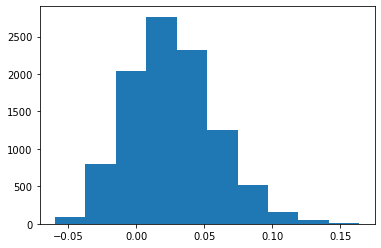

In [190]:
# De même qu'avant, on sélectionne la plage de valeurs entre lesquelles nous choisirons le seuil.
plt.hist(TF_part2)

2.1.2 a : démonstration du maximum de vraisemblance.

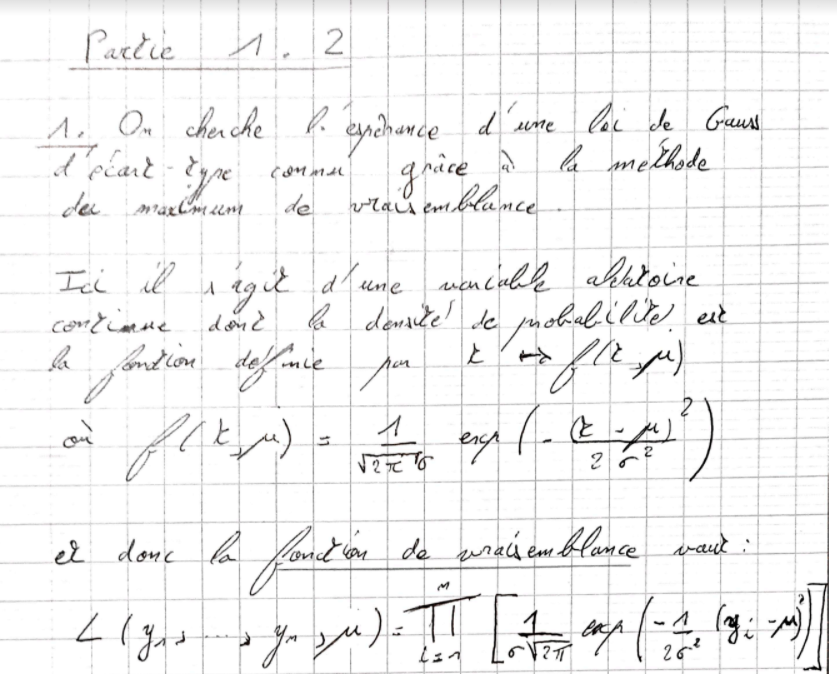

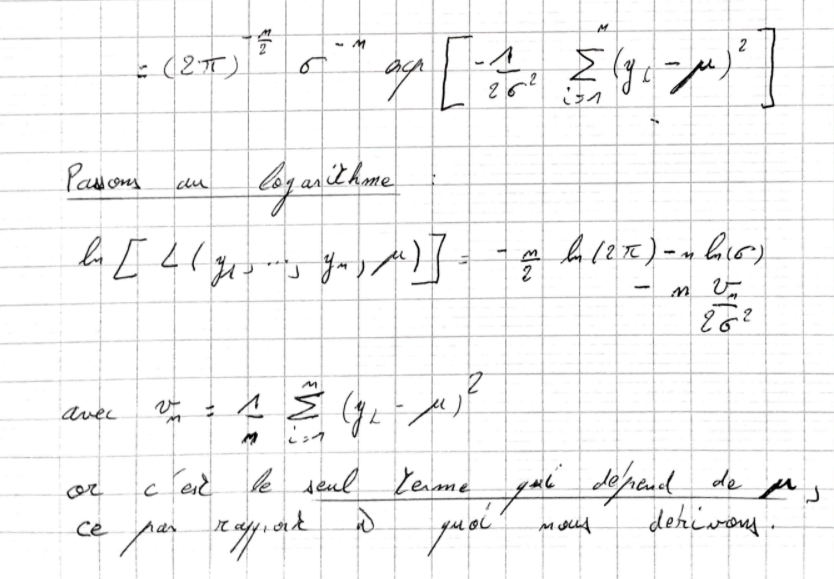

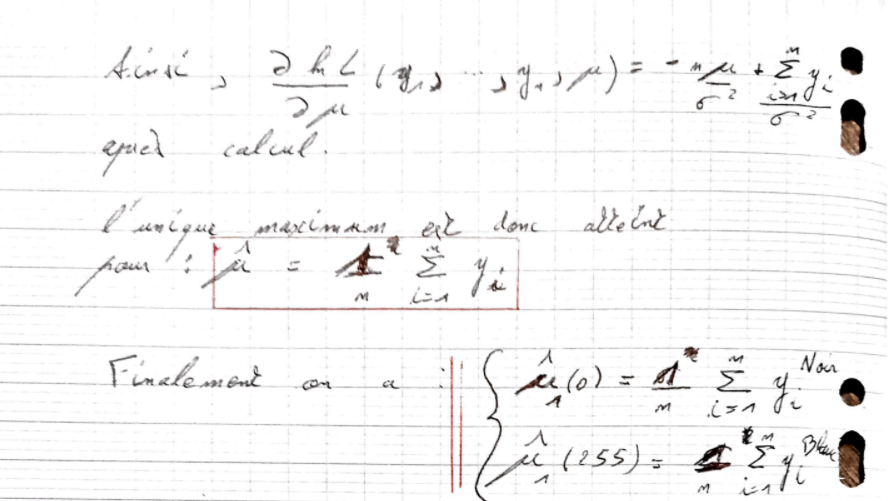

['alpha =     0.6454', 'beta =     0.0000', 'seuil = -0.065']
['alpha =     0.5033', 'beta =     0.0000', 'seuil = -0.064']
['alpha =     0.3775', 'beta =     0.0000', 'seuil = -0.063']
['alpha =     0.2790', 'beta =     0.0000', 'seuil = -0.062']
['alpha =     0.2007', 'beta =     0.0000', 'seuil = -0.061']
['alpha =     0.1404', 'beta =     0.0000', 'seuil = -0.06']
['alpha =     0.0993', 'beta =     0.0001', 'seuil = -0.059']
['alpha =     0.0637', 'beta =     0.0002', 'seuil = -0.058']
['alpha =     0.0430', 'beta =     0.0003', 'seuil = -0.057']
['alpha =     0.0279', 'beta =     0.0003', 'seuil = -0.056']
['alpha =     0.0176', 'beta =     0.0004', 'seuil = -0.055']
['alpha =     0.0115', 'beta =     0.0004', 'seuil = -0.054']
['alpha =     0.0070', 'beta =     0.0008', 'seuil = -0.053']
['alpha =     0.0045', 'beta =     0.0010', 'seuil = -0.052']
['alpha =     0.0026', 'beta =     0.0011', 'seuil = -0.051']


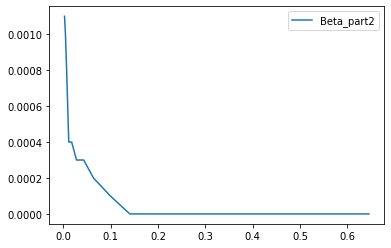

In [191]:
# 2.1.2 b

alphas_part2 =[]
betas_part2= []
for i in range(-65,-50):
    seuil = i/1000
    alpha = np.count_nonzero(np.array(TA_part2)>seuil)/len(TA_part2)
    beta = np.count_nonzero(np.array(TF_part2)<seuil)/len(TF_part2)
    print(['alpha = '+"{:10.4f}".format(alpha),'beta = '+"{:10.4f}".format(beta),'seuil = '+str(seuil)])
    alphas_part2.append(alpha)
    betas_part2.append(beta)

plt.plot(alphas_part2, betas_part2,label='Beta_part2')
plt.legend()



*Test sur des images*

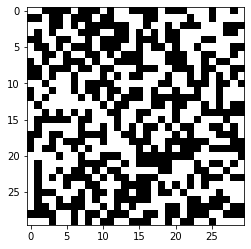

In [192]:
#On importe tout ce dont on a besoin
BarcodesTestact = r'C:\Users\boite\OneDrive\Bureau\Germain\IMT_lille_douai\cybersecurite\SAFE\TP_Sawayah\Testcodes_act//'
originalTestact = io.imread(r'C:\Users\boite\OneDrive\Bureau\Germain\IMT_lille_douai\cybersecurite\SAFE\TP_Sawayah\Testcodes_act//OriginalCode.pgm')
plt.imshow(originalTestact,cmap='gray')

In [193]:
# on calcule les vecteurs et autres éléments associés

y_blancsTestact = np.array([[i,j]for i in range(len(originalTestact)) for j in range(len(originalTestact[0])) if originalTestact[i][j]==255])
y_noirsTestact= np.array([[i,j]for i in range(len(originalTestact)) for j in range(len(originalTestact[0])) if originalTestact[i][j]==0])

PnyBlancsTestact = Pn(y_blancsTestact,BarcodesTestact)
PnyNoirsTestact = Pn(y_noirsTestact,BarcodesTestact)

StatsAct = statistiques_part2(BarcodesTestact,PnyNoirsTestact,PnyBlancsTestact,dimCode_part2)[:-1]

On choisit un seuil de -0,054 pour respecter la condition $\alpha = 10^{-2}$.

In [194]:


start = r'C:\Users\boite\OneDrive\Bureau\Germain\IMT_lille_douai\cybersecurite\SAFE\TP_Sawayah\Testcodes_act' 
#on retirera le début du nom de chaque fichier pour plus de lisibilité
path= Path(start)

seuil=-0.054
p=Path(BarcodesTestact)
i=0
for fname in p.glob("*2Dbarcode*.*"):
    if StatsAct[i]<seuil:
        print(str(os.path.relpath(fname, path))+': est Authentique')
    else :
        print(str(os.path.relpath(fname, path))+': est Falsifié')
    i+=1

2Dbarcode1.pgm: est Falsifié
2Dbarcode10.pgm: est Falsifié
2Dbarcode2.pgm: est Falsifié
2Dbarcode3.pgm: est Authentique
2Dbarcode4.pgm: est Falsifié
2Dbarcode5.pgm: est Authentique
2Dbarcode6.pgm: est Authentique
2Dbarcode7.pgm: est Falsifié
2Dbarcode8.pgm: est Authentique
2Dbarcode9.pgm: est Authentique


Conclusion :

    Au terme de cette étude, nous avons pu travailler sur une grande base de données de QRcode afin de faire du machine learning qui a servi à prédire l'authenticité d'un QRcode. 3 méthodes ont été passées en revue, pour comprendre les différents degrés d'attaques frauduleuses. J'espère que les commentaires auront aidés à la compréhension du code et de la méthode de travail.


   Le lancement du TP était très laborieux comme beaucoup de notions sont abordées ensemble.
Néanmoins, une fois la prise en main faite, et notamment l'implémentation de la première partie, le reste du sujet se traite relativement facilement.
J'ai apprécié travailler sur ce TP qui mêle machine learning, détection de fraude, prédiction... Cela confirme mon orientation vers la science des données.